In [1]:
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

aoa_wg_path = Path('/home/marvinlvn/ChildDirectedLexicalTest/data/wordbank/aoa_wg.csv')
aoa_ws_path = Path('/home/marvinlvn/ChildDirectedLexicalTest/data/wordbank/aoa_ws.csv')
corpus_path = Path('/home/marvinlvn/ChildDirectedLexicalTest/child_workspace/corpora/wuggy_pairs/corpus_1_keep_10.csv')
frequency_path = Path('/home/marvinlvn/ChildDirectedLexicalTest/child_workspace/corpora/tokenized/corpus_1.csv')

# Get test words along with their frequencies
frequencies = pd.read_csv(frequency_path, sep='\t')
words = pd.read_csv(corpus_path, sep='\t')['word'].unique()
frequencies = frequencies[frequencies.word.isin(words)]
assert len(words) == len(frequencies)

# Load wordbank data
aoa_wg = pd.read_csv(aoa_wg_path, sep=',').iloc[:, 1:]
aoa_ws =  pd.read_csv(aoa_ws_path, sep=',').iloc[:, 1:]

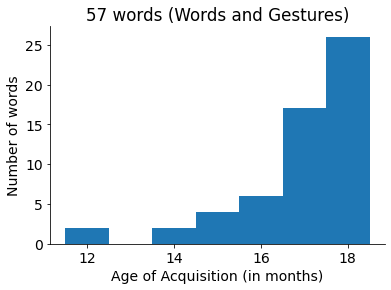

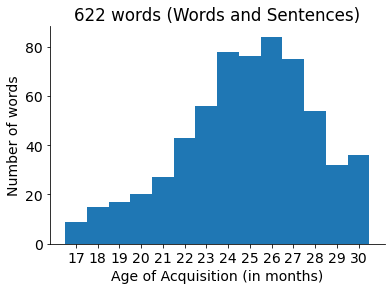

In [2]:
plt.rcParams.update({'font.size': 14})

aoa_wg.hist('aoa', bins=range(aoa_wg['aoa'].min(),aoa_wg['aoa'].max()+2,1), align='left')
plt.xlabel("Age of Acquisition (in months)")
plt.ylabel("Number of words")
plt.title("%d words (Words and Gestures)" % len(aoa_wg))
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('/home/marvinlvn/Documents/Wordbank/aoa_wg.png', dpi=150)

plt.rcParams.update({'font.size': 14})
aoa_ws.hist('aoa', bins=range(aoa_ws['aoa'].min(),aoa_ws['aoa'].max()+2,1), align='left')
plt.xlabel("Age of Acquisition (in months)")
plt.ylabel("Number of words")
plt.xticks(range(aoa_ws['aoa'].min(),aoa_ws['aoa'].max()+1,1))
plt.title("%d words (Words and Sentences)" % len(aoa_ws))
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('/home/marvinlvn/Documents/Wordbank/aoa_ws.png', dpi=150)


In [18]:
in_swuggy_wg = aoa_wg[aoa_wg.definition.isin(frequencies.word)]
out_swuggy_wg = aoa_wg[~aoa_wg.definition.isin(frequencies.word)]
in_swuggy_ws = aoa_ws[aoa_ws.definition.isin(frequencies.word)]
out_swuggy_ws = aoa_ws[~aoa_ws.definition.isin(frequencies.word)]

[print(e, end=', ') for e in list(out_swuggy_wg.definition)]
print("_____")
[print(e, end=', ') for e in list(out_swuggy_ws.definition)]

print(len(in_swuggy_wg))
print(len(out_swuggy_wg))
print(len(in_swuggy_ws))
print(len(out_swuggy_ws))

baa baa, grrr, quack quack, uh oh, vroom, woof woof, yum yum, bear, sock, eye, owie, bye, night night, thank you, all gone, _____
choo choo, cockadoodledoo, quack quack, vroom, ant, bear, bee, deer, teddybear, firetruck, play dough, toy, drink, french fries, green beans, ice cream, peanut butter, potato chip, sock, belly button, eye, leg, owie, tongue, clock, high chair, living room, rocking chair, sink, TV, washing machine, hose, lawn mower, gas station, babysitter's name, child's own name, pet's name, give me five!, gonna get you!, go potty, night night, pattycake, shh, so big!, thank you, this little piggy, turn around, buy, drink, hear, hide, lick, like, make, write, all gone, high, red, sick, I, me, mine, next to, on top of, a, a lot, too, 42
15
555
67


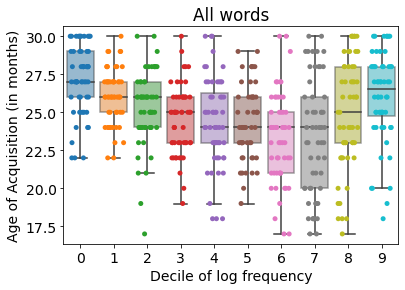

In [84]:
import seaborn as sns
import numpy as np

in_swuggy_ws2 = pd.merge(in_swuggy_ws, frequencies, left_on='definition', right_on='word', how='inner')
in_swuggy_ws2['frequency'] = in_swuggy_ws2['count'] / frequencies['count'].sum()
in_swuggy_ws2['frequency'] = np.log(in_swuggy_ws2['frequency'])
in_swuggy_ws2['frequency'] = pd.qcut(in_swuggy_ws2['frequency'].rank(method='first').values, 10).codes
sns.boxplot(y='aoa', x='frequency', data=in_swuggy_ws2,showfliers=False, boxprops=dict(alpha=.5))
sns.stripplot(y='aoa', x='frequency', data=in_swuggy_ws2, jitter=0.3)
plt.title('')
plt.xlabel("Decile of log frequency")
plt.ylabel("Age of Acquisition (in months)")
plt.title("All words")
plt.savefig('/home/marvinlvn/Documents/Wordbank/frequency_aoa.png', dpi=150, bbox_inches='tight')
plt.show()

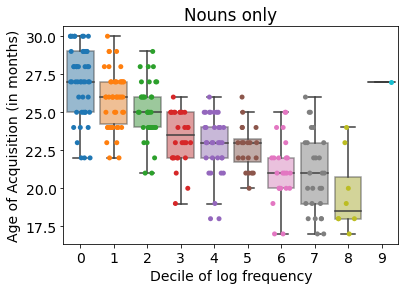

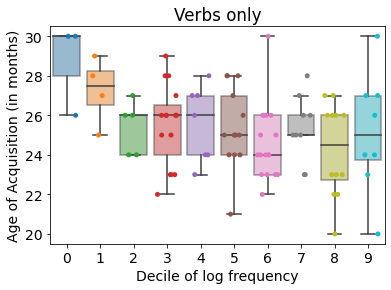

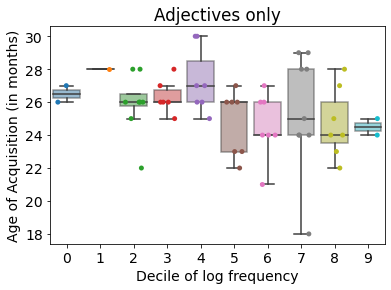

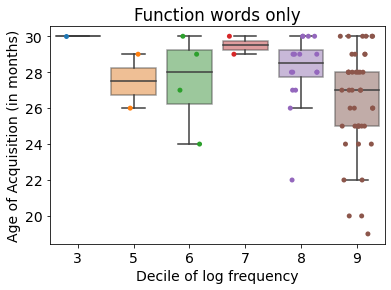

In [86]:
in_swuggy_ws3 = in_swuggy_ws2[in_swuggy_ws2.lexical_class == 'nouns']
sns.boxplot(y='aoa', x='frequency', data=in_swuggy_ws3,showfliers=False, boxprops=dict(alpha=.5))
sns.stripplot(y='aoa', x='frequency', data=in_swuggy_ws3, jitter=0.3)
plt.title('')
plt.xlabel("Decile of log frequency")
plt.ylabel("Age of Acquisition (in months)")
plt.title("Nouns only")
plt.savefig('/home/marvinlvn/Documents/Wordbank/frequency_aoa_nouns.png', dpi=150, bbox_inches='tight')
plt.show()

in_swuggy_ws3 = in_swuggy_ws2[in_swuggy_ws2.lexical_class == 'verbs']
sns.boxplot(y='aoa', x='frequency', data=in_swuggy_ws3,showfliers=False, boxprops=dict(alpha=.5))
sns.stripplot(y='aoa', x='frequency', data=in_swuggy_ws3, jitter=0.3)
plt.title('')
plt.xlabel("Decile of log frequency")
plt.ylabel("Age of Acquisition (in months)")
plt.title("Verbs only")
plt.savefig('/home/marvinlvn/Documents/Wordbank/frequency_aoa_verbs.png', dpi=150, bbox_inches='tight')
plt.show()

in_swuggy_ws3 = in_swuggy_ws2[in_swuggy_ws2.lexical_class == 'adjectives']
sns.boxplot(y='aoa', x='frequency', data=in_swuggy_ws3,showfliers=False, boxprops=dict(alpha=.5))
sns.stripplot(y='aoa', x='frequency', data=in_swuggy_ws3, jitter=0.3)
plt.title('')
plt.xlabel("Decile of log frequency")
plt.ylabel("Age of Acquisition (in months)")
plt.title("Adjectives only")
plt.savefig('/home/marvinlvn/Documents/Wordbank/frequency_aoa_adjectives.png', dpi=150, bbox_inches='tight')
plt.show()

in_swuggy_ws3 = in_swuggy_ws2[in_swuggy_ws2.lexical_class == 'function_words']
sns.boxplot(y='aoa', x='frequency', data=in_swuggy_ws3,showfliers=False, boxprops=dict(alpha=.5))
sns.stripplot(y='aoa', x='frequency', data=in_swuggy_ws3, jitter=0.3)
plt.title('')
plt.xlabel("Decile of log frequency")
plt.ylabel("Age of Acquisition (in months)")
plt.title("Function words only")
plt.savefig('/home/marvinlvn/Documents/Wordbank/frequency_aoa_function_words.png', dpi=150, bbox_inches='tight')
plt.show()

In [77]:
in_swuggy_ws2.lexical_class.unique()

array(['other', 'nouns', 'adjectives', 'function_words', 'verbs', nan],
      dtype=object)